<a href="https://colab.research.google.com/github/shrutibalan4591/github-slideshow/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and reading file

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import calendar




In [ ]:
# Load datasets
data_w = pd.read_csv('/content/drive/MyDrive/Weather History/weatherHistory.csv')
data_w.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


# Data Cleaning

In [ ]:
# No. of rows and columns
data_w.shape

(96453, 11)

Look for any duplicates

In [ ]:
# Check for duplicate rows
data_w.drop_duplicates()
data_w.shape

(96453, 11)

No duplicates were found. Next check for validity of datatypes

In [ ]:
# Check datatypes
data_w.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Formatted Date is assigned values of type object. Change it to datetime datatype.

In [ ]:
# Change data type of Formatted date
data_w['Formatted Date'] = pd.to_datetime(data_w['Formatted Date'], utc=True)
data_w.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


Check for null values

In [ ]:
# Check for null values
data_w.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Data Analysis

In [ ]:
# Create a new dataframe from data_w with necessary columns
data_n = data_w[['Formatted Date', 'Apparent Temperature (C)', 'Humidity']]
data_n.set_index('Formatted Date', inplace=True)
data_n.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


Analysing with hourly data on a high level is difficult. So we resample the data to month level

In [ ]:
# Resample data monthwise
data_n = data_n[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
data_n.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


### Plotting

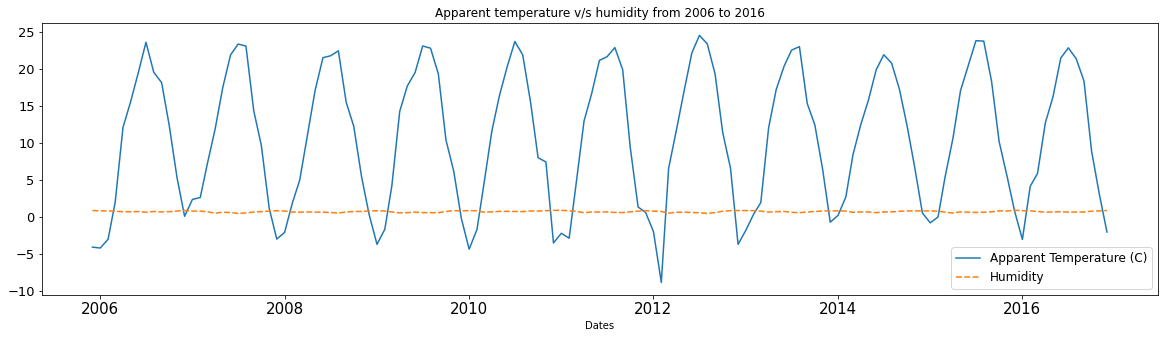

In [ ]:
# Plotting apparent temperature and humidity from 2006 to 2016
plt.figure(figsize=(20,5))
plt.title('Apparent temperature v/s humidity from 2006 to 2016')
sns.lineplot(data=data_n)
plt.xlabel('Dates')
plt.legend(loc = 0, fontsize = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.show()

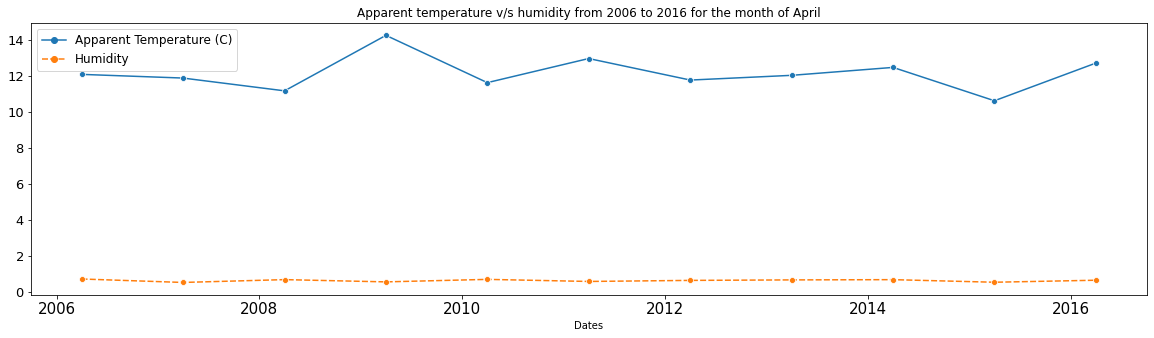

In [ ]:
# Lets plot the graph for April month
april = data_n[data_n.index.month==4]
plt.figure(figsize=(20,5))
plt.title('Apparent temperature v/s humidity from 2006 to 2016 for the month of April')
sns.lineplot(data=april, markers=['o', 'o'])
plt.xlabel('Dates')
plt.legend(loc = 0, fontsize = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.show()

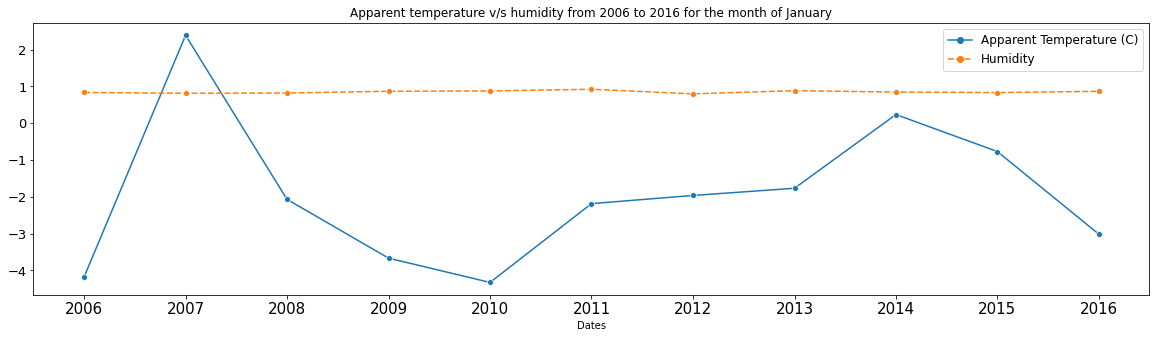

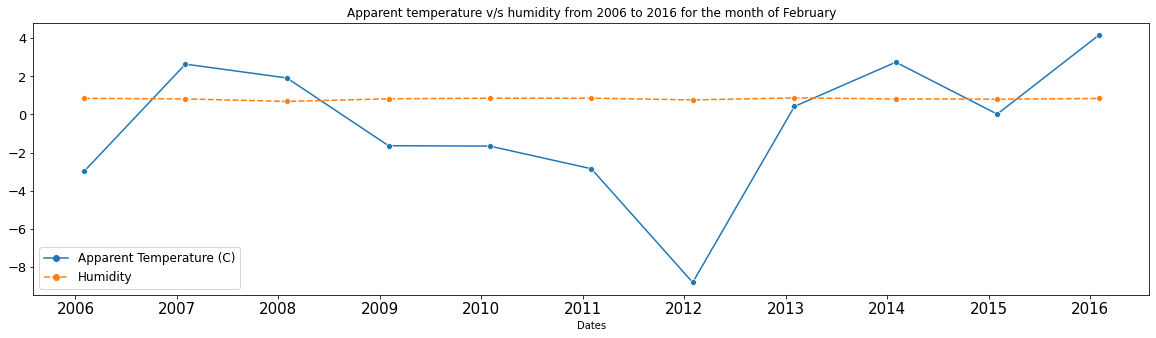

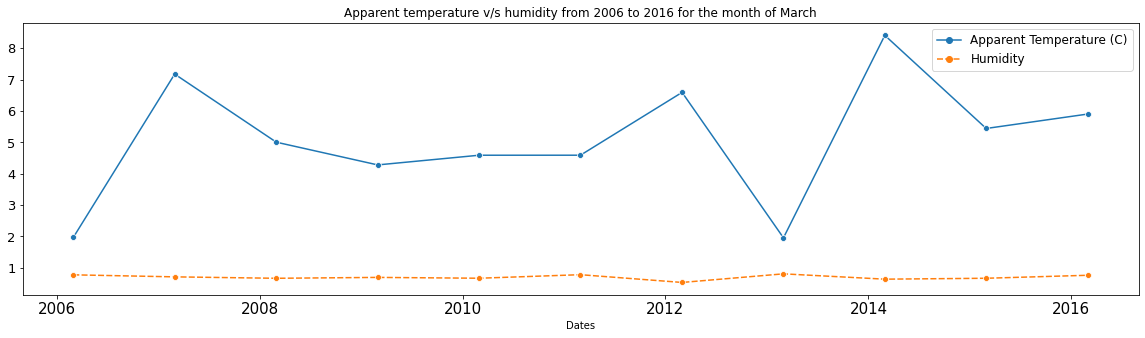

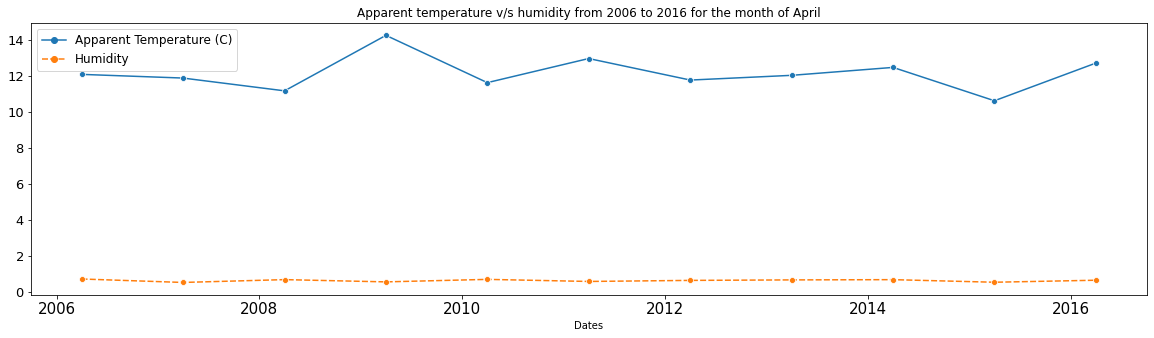

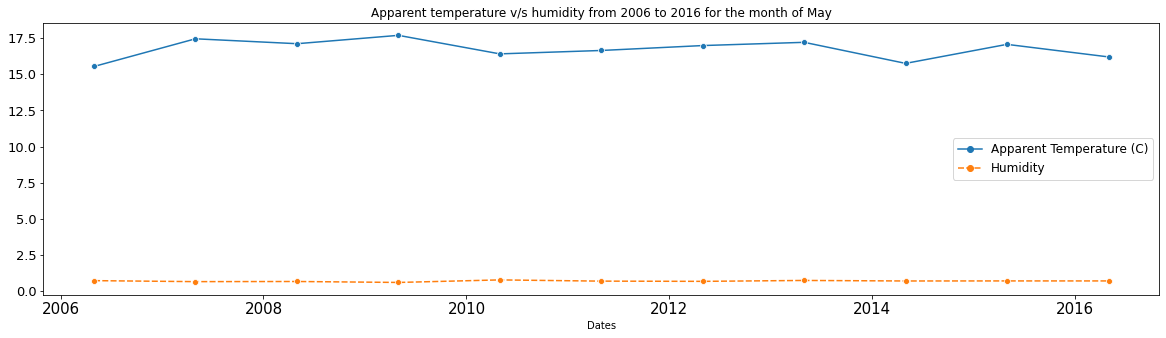

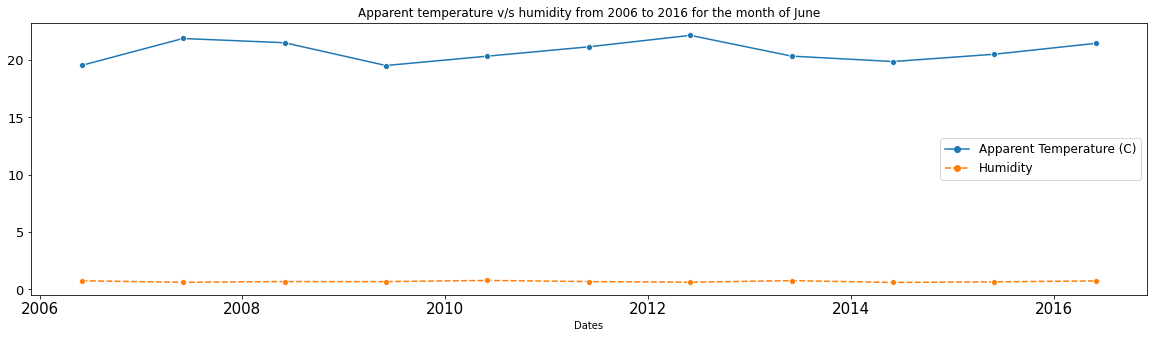

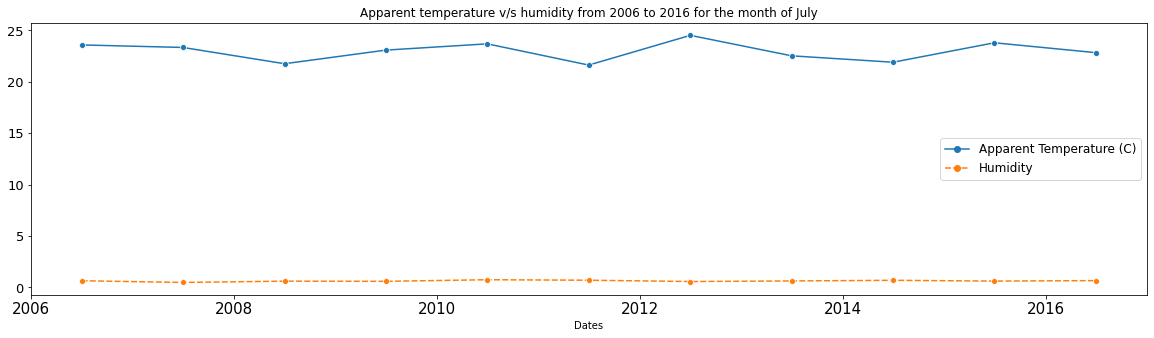

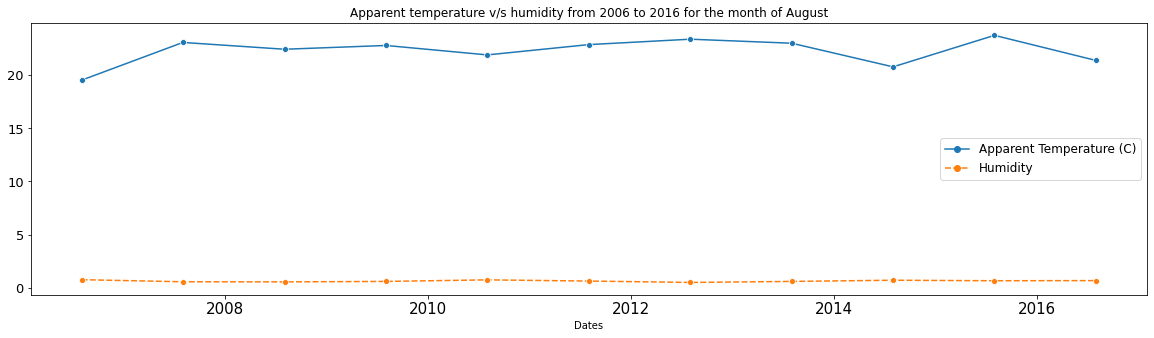

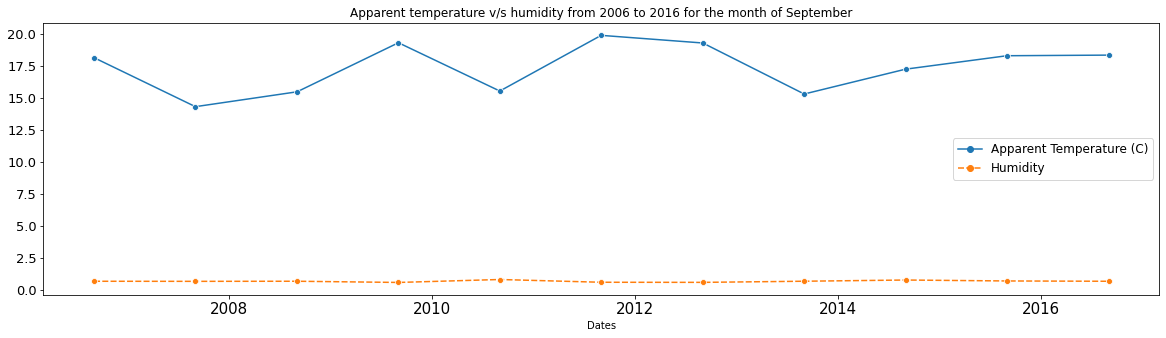

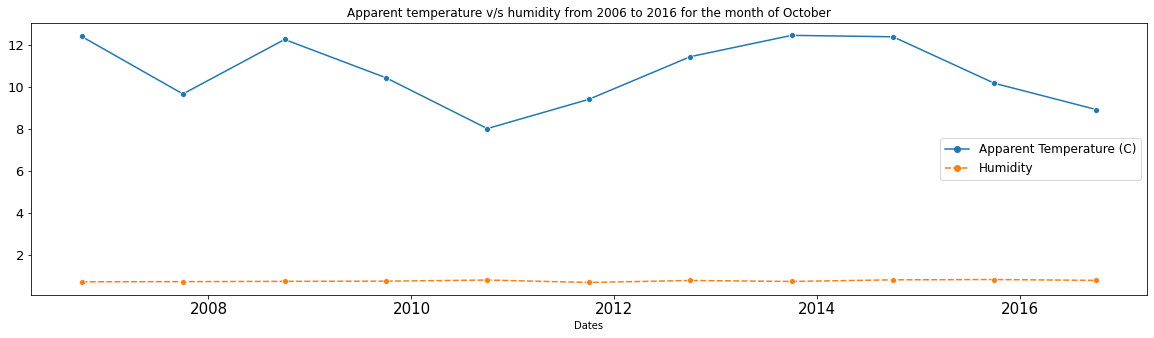

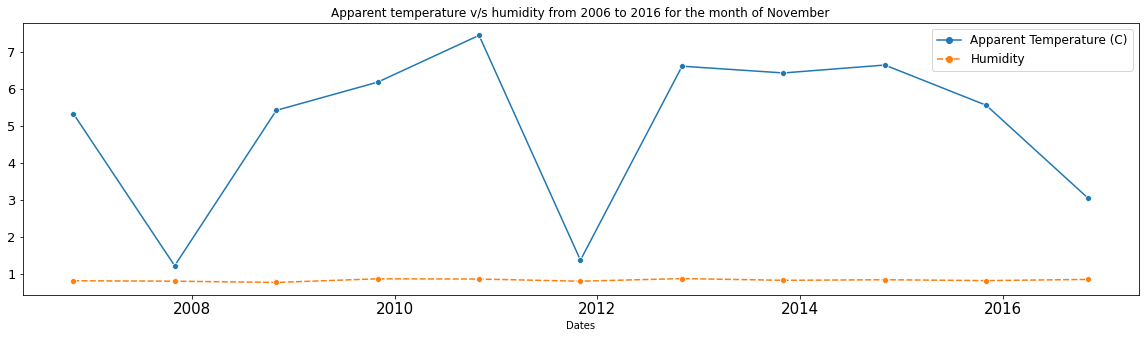

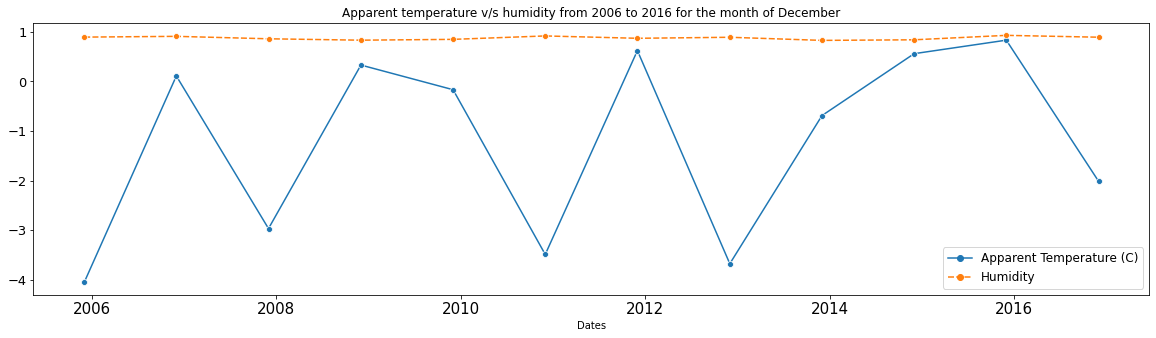

In [ ]:
# Lets plot the graph for each month separately
for i in range(12):
  i = i+1
  mon = data_n[data_n.index.month==i]
  plt.figure(figsize=(20,5))
  plt.title('Apparent temperature v/s humidity from 2006 to 2016 for the month of ' + calendar.month_name[i])
  sns.lineplot(data=mon, markers=['o', 'o'])
  plt.xlabel('Dates')
  plt.legend(loc = 0, fontsize = 12)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 13)
  plt.show()